<a href="https://colab.research.google.com/github/NazarovMM/RAG-system-for-dissertation/blob/main/Graphs_For__Dissertation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def analyze_model_results(results):

    if not isinstance(results, pd.Series):
        results = pd.Series(results)

    # Создаем фигуру с несколькими графиками
    fig, axes = plt.subplots(2, 1, figsize=(10, 12))

    # 1. Круговая диаграмма
    plt.subplot(2, 1, 1)
    counts = results.value_counts()
    colors = ['#2ecc71', '#e74c3c']  # зеленый для True, красный для False
    plt.pie(counts,
            labels=['Совпадает', 'Не совпадает'],
            colors=colors,
            autopct='%1.1f%%',
            explode=(0.05, 0.05))
    plt.title('Распределение результатов модели')

    # 2. Столбчатая диаграмма
    plt.subplot(2, 1, 2)
    sns.barplot(x=counts.index.map({True: 'Совпадает', False: 'Не совпадает'}),
                y=counts.values,
                palette=colors)
    plt.title('Количество совпадений и несовпадений')
    plt.xlabel('Результат')
    plt.ylabel('Количество')

    # Добавляем подписи со значениями над столбцами
    for i, v in enumerate(counts):
        plt.text(i, v, str(v), ha='center', va='bottom')

    # Выводим основные метрики
    print("\nОсновные метрики:")
    print(f"Всего наблюдений: {len(results)}")
    print(f"Количество совпадений: {counts.get(True, 0)}")
    print(f"Количество несовпадений: {counts.get(False, 0)}")
    print(f"Точность модели: {(counts.get(True, 0) / len(results) * 100):.2f}%")

    plt.tight_layout()
    return fig

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/NazarovMM/RAG-system-for-dissertation/refs/heads/main/promtCheck0-30.csv')
df.head()

,decision
0,False
1,False
2,False
3,True
4,True


<ipython-input-2-9ce6022ebd80>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index.map({True: 'Совпадает', False: 'Не совпадает'}),



Основные метрики:
Всего наблюдений: 30
Количество совпадений: 16
Количество несовпадений: 14
Точность модели: 53.33%


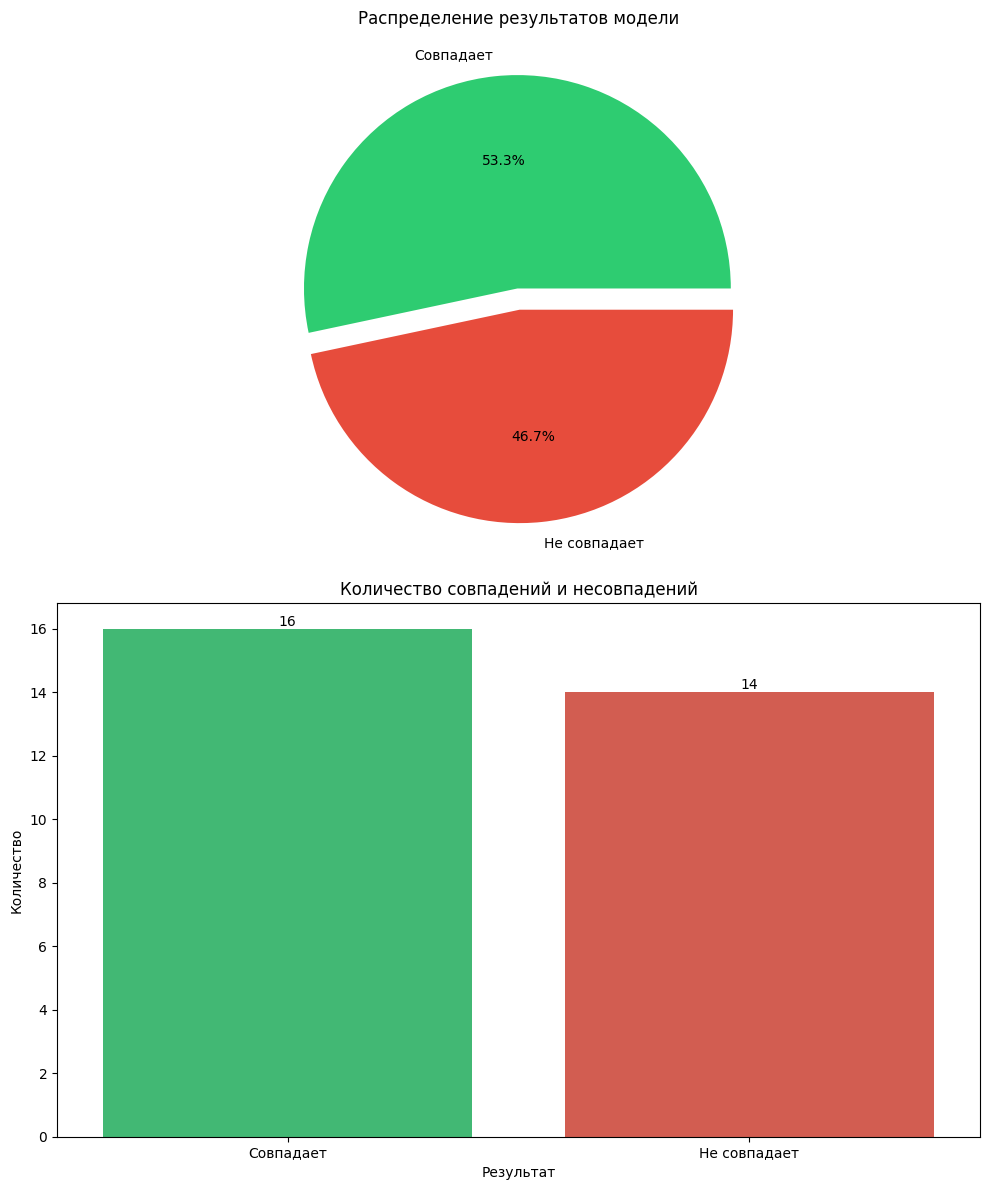

In [4]:
sample_results = pd.Series(data=df['decision'])

# Строим графики
fig = analyze_model_results(sample_results)
plt.show()

In [5]:
frames = pd.read_csv("https://raw.githubusercontent.com/NazarovMM/RAG-system-for-dissertation/refs/heads/main/frames.csv")

In [6]:
frames.head(5)

,Unnamed: 0,Prompt,Answer,wikipedia_link_1,wikipedia_link_2,wikipedia_link_3,wikipedia_link_4,wikipedia_link_5,wikipedia_link_6,wikipedia_link_7,wikipedia_link_8,wikipedia_link_9,wikipedia_link_10,wikipedia_link_11+,reasoning_types,wiki_links
0,0,If my future wife has the same first name as t...,Jane Ballou,https://en.wikipedia.org/wiki/President_of_the...,https://en.wikipedia.org/wiki/James_Buchanan,https://en.wikipedia.org/wiki/Harriet_Lane,https://en.wikipedia.org/wiki/List_of_presiden...,https://en.wikipedia.org/wiki/James_A._Garfield,NaN,NaN,NaN,NaN,NaN,NaN,Multiple constraints,['https://en.wikipedia.org/wiki/President_of_t...
1,1,Imagine there is a building called Bronte towe...,37th,https://en.wikipedia.org/wiki/Charlotte_Bront%...,https://en.wikipedia.org/wiki/Jane_Eyre,https://en.wikipedia.org/wiki/List_of_tallest_...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Numerical reasoning | Tabular reasoning | Mult...,['https://en.wikipedia.org/wiki/Charlotte_Bron...
2,2,How many years earlier would Punxsutawney Phil...,87,https://en.wikipedia.org/wiki/Punxsutawney_Phil,https://en.wikipedia.org/wiki/United_States_Ca...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Numerical reasoning | Multiple constraints | T...,['https://en.wikipedia.org/wiki/Punxsutawney_P...
3,3,"As of August 1, 2024, which country were holde...",France,https://en.wikipedia.org/wiki/FIFA_World_Cup,https://en.wikipedia.org/wiki/London,https://en.wikipedia.org/wiki/UEFA_Champions_L...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tabular reasoning | Multiple constraints | Tem...,['https://en.wikipedia.org/wiki/FIFA_World_Cup...
4,4,What is the name of the vocalist from the firs...,Jens Kidman,https://en.wikipedia.org/wiki/Dismal_Euphony,https://en.wikipedia.org/wiki/All_Little_Devils,https://en.wikipedia.org/wiki/Nuclear_Blast,https://en.wikipedia.org/wiki/Meshuggah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Multiple constraints,['https://en.wikipedia.org/wiki/Dismal_Euphony...


In [7]:
frames['reasoning_types'].describe()

,reasoning_types
count,824
unique,30
top,Multiple constraints
freq,265


In [ ]:
pd.set_option('display.max_colwidth', None)
frames['reasoning_types'].head(3)

,reasoning_types
0,Multiple constraints
1,Numerical reasoning | Tabular reasoning | Multiple constraints
2,Numerical reasoning | Multiple constraints | Temporal reasoning


In [ ]:
reason_type=pd.DataFrame({
    'Multiple Constraints': frames['reasoning_types'].str.contains('Multiple constraints').astype(int),
    'Numerical Reasoning': frames['reasoning_types'].str.contains('Numerical reasoning').astype(int),
    'Post Processing': frames['reasoning_types'].str.contains('Post processing').astype(int),
    'Tabular Reasoning': frames['reasoning_types'].str.contains('Tabular reasoning').astype(int),
    'Temporal Reasoning': frames['reasoning_types'].str.contains('Temporal reasoning').astype(int)
}).copy()

In [ ]:
reason_type.head(30)

,Multiple Constraints,Numerical Reasoning,Post Processing,Tabular Reasoning,Temporal Reasoning
0,1,0,0,0,0
1,1,1,0,1,0
2,1,1,0,0,1
3,1,0,0,1,1
4,1,0,0,0,0
5,1,1,0,1,0
6,1,1,0,0,1
7,1,0,0,0,1
8,1,0,0,1,1
9,0,0,0,0,1


In [ ]:
decision_with_reason_type=pd.concat([df, reason_type.loc[0:29]], axis=1)

In [ ]:
decision_with_reason_type

,decision,Multiple Constraints,Numerical Reasoning,Post Processing,Tabular Reasoning,Temporal Reasoning
0,False,1,0,0,0,0
1,False,1,1,0,1,0
2,False,1,1,0,0,1
3,True,1,0,0,1,1
4,True,1,0,0,0,0
5,True,1,1,0,1,0
6,False,1,1,0,0,1
7,False,1,0,0,0,1
8,False,1,0,0,1,1
9,True,0,0,0,0,1


In [ ]:
true_counts = decision_with_reason_type.loc[df['decision'] == True, ['Multiple Constraints', 'Numerical Reasoning','Post Processing', 'Tabular Reasoning', 'Temporal Reasoning']].sum()
false_counts = decision_with_reason_type.loc[df['decision'] == False, ['Multiple Constraints', 'Numerical Reasoning', 'Post Processing', 'Tabular Reasoning', 'Temporal Reasoning']].sum()


<Figure size 2000x1000 with 0 Axes>

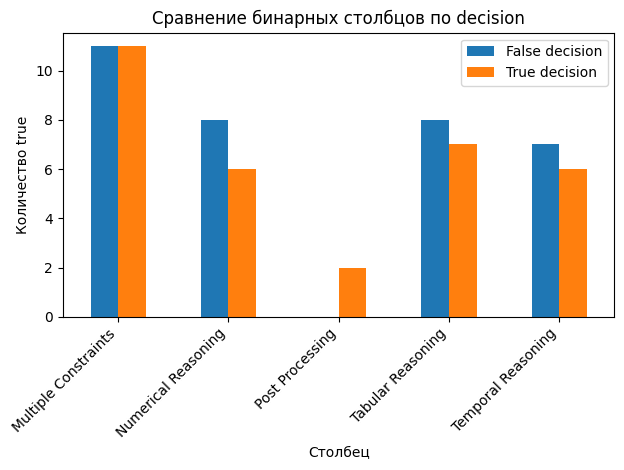

In [ ]:
comparison_df = pd.DataFrame({
    'False decision': false_counts,
    'True decision': true_counts
})

plt.figure(figsize=(20, 10))
comparison_df.plot(kind='bar')
plt.title('Сравнение бинарных столбцов по decision')
plt.xlabel('Столбец')
plt.ylabel('Количество true')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [ ]:
print('true_counts', true_counts)

true_counts Multiple Constraints    11
Numerical Reasoning      6
Post Processing          2
Tabular Reasoning        7
Temporal Reasoning       6
dtype: int64


In [ ]:
print('false_counts', false_counts)

false_counts Multiple Constraints    11
Numerical Reasoning      8
Post Processing          0
Tabular Reasoning        8
Temporal Reasoning       7
dtype: int64


In [ ]:
# frames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          824 non-null    int64 
 1   Prompt              824 non-null    object
 2   Answer              824 non-null    object
 3   wikipedia_link_1    824 non-null    object
 4   wikipedia_link_2    824 non-null    object
 5   wikipedia_link_3    514 non-null    object
 6   wikipedia_link_4    226 non-null    object
 7   wikipedia_link_5    92 non-null     object
 8   wikipedia_link_6    53 non-null     object
 9   wikipedia_link_7    36 non-null     object
 10  wikipedia_link_8    23 non-null     object
 11  wikipedia_link_9    17 non-null     object
 12  wikipedia_link_10   14 non-null     object
 13  wikipedia_link_11+  13 non-null     object
 14  reasoning_types     824 non-null    object
 15  wiki_links          824 non-null    object
dtypes: int64(1), object(15)
me

In [ ]:
a=frames[['wikipedia_link_1', 'wikipedia_link_2','wikipedia_link_3','wikipedia_link_4','wikipedia_link_5','wikipedia_link_6', 'wikipedia_link_7','wikipedia_link_8','wikipedia_link_9','wikipedia_link_10','wikipedia_link_11+']]

In [ ]:
a.head(5)

,wikipedia_link_1,wikipedia_link_2,wikipedia_link_3,wikipedia_link_4,wikipedia_link_5,wikipedia_link_6,wikipedia_link_7,wikipedia_link_8,wikipedia_link_9,wikipedia_link_10,wikipedia_link_11+
0,https://en.wikipedia.org/wiki/President_of_the_United_States,https://en.wikipedia.org/wiki/James_Buchanan,https://en.wikipedia.org/wiki/Harriet_Lane,https://en.wikipedia.org/wiki/List_of_presidents_of_the_United_States_who_died_in_office,https://en.wikipedia.org/wiki/James_A._Garfield,NaN,NaN,NaN,NaN,NaN,NaN
1,https://en.wikipedia.org/wiki/Charlotte_Bront%C3%AB,https://en.wikipedia.org/wiki/Jane_Eyre,https://en.wikipedia.org/wiki/List_of_tallest_buildings_in_New_York_City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Punxsutawney_Phil,https://en.wikipedia.org/wiki/United_States_Capitol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/FIFA_World_Cup,https://en.wikipedia.org/wiki/London,https://en.wikipedia.org/wiki/UEFA_Champions_League,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Dismal_Euphony,https://en.wikipedia.org/wiki/All_Little_Devils,https://en.wikipedia.org/wiki/Nuclear_Blast,https://en.wikipedia.org/wiki/Meshuggah,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Создает новый датафрейм, который содержит количество столбцов без значений NaN для каждой строки входного датафрейма
def create_non_null_column_counts(df):
    non_null_counts = []
    for i in range(len(df)):
        row = df.iloc[i]
        non_null_counts.append(row.notna().sum())

    return pd.DataFrame({'links_num': non_null_counts})

In [ ]:
num_links=create_non_null_column_counts(a)

In [ ]:
num_links.head(10)

,links_num
0,5
1,3
2,2
3,3
4,4
5,3
6,5
7,4
8,6
9,4


In [ ]:
decision_with_reason_type_with_num_links=pd.concat([decision_with_reason_type, num_links.loc[0:29]], axis=1)

In [ ]:
decision_with_reason_type_with_num_links

,decision,Multiple Constraints,Numerical Reasoning,Post Processing,Tabular Reasoning,Temporal Reasoning,links_num
0,False,1,0,0,0,0,5
1,False,1,1,0,1,0,3
2,False,1,1,0,0,1,2
3,True,1,0,0,1,1,3
4,True,1,0,0,0,0,4
5,True,1,1,0,1,0,3
6,False,1,1,0,0,1,5
7,False,1,0,0,0,1,4
8,False,1,0,0,1,1,6
9,True,0,0,0,0,1,4


In [ ]:
decision_with_reason_type_with_num_links.groupby('decision')['links_num'].mean()

,links_num
decision,
False,3.857143
True,3.437500


In [ ]:
decision_with_reason_type_with_num_links.groupby('links_num')['decision'].count()

,decision
links_num,
2,3
3,13
4,9
5,3
6,1
7,1


In [ ]:
filtered_counts_true = decision_with_reason_type_with_num_links[decision_with_reason_type_with_num_links['decision'] == True].groupby('links_num')['decision'].count()

In [ ]:
filtered_counts_true

,decision
links_num,
2,2
3,8
4,5
7,1


In [ ]:
filtered_counts_false = decision_with_reason_type_with_num_links[decision_with_reason_type_with_num_links['decision'] == False].groupby('links_num')['decision'].count()

In [ ]:
filtered_counts_false

,decision
links_num,
2,1
3,5
4,4
5,3
6,1


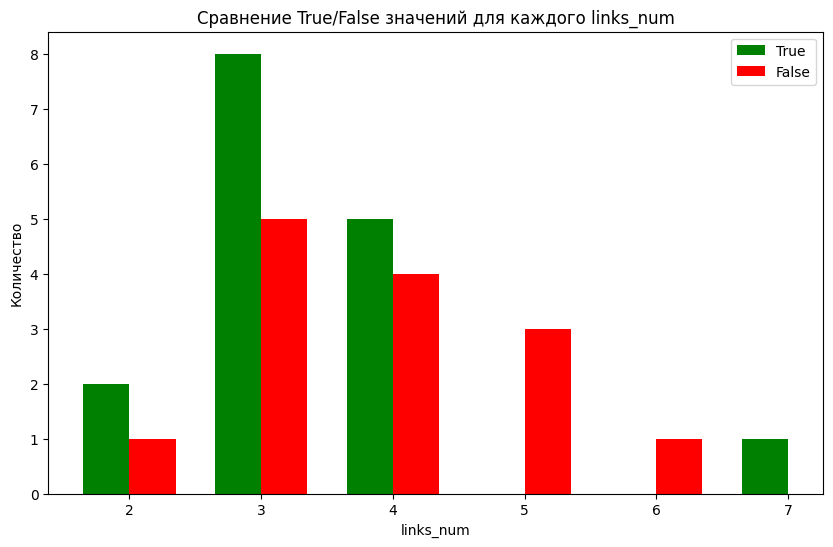

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# Столбцы для True значений
ax.bar(filtered_counts_true.index, filtered_counts_true.values, width=0.35, color='green', label='True')

# Столбцы для False значений
ax.bar(filtered_counts_false.index + 0.35, filtered_counts_false.values, width=0.35, color='red', label='False')

# Настройка графика
ax.set_xlabel('links_num')
ax.set_ylabel('Количество')
ax.set_title('Сравнение True/False значений для каждого links_num')
ax.legend()

all_index = filtered_counts_true.index.union(filtered_counts_false.index)
plt.xticks(all_index + 0.35 / 2, all_index) # Центрирование меток на оси X

plt.show()

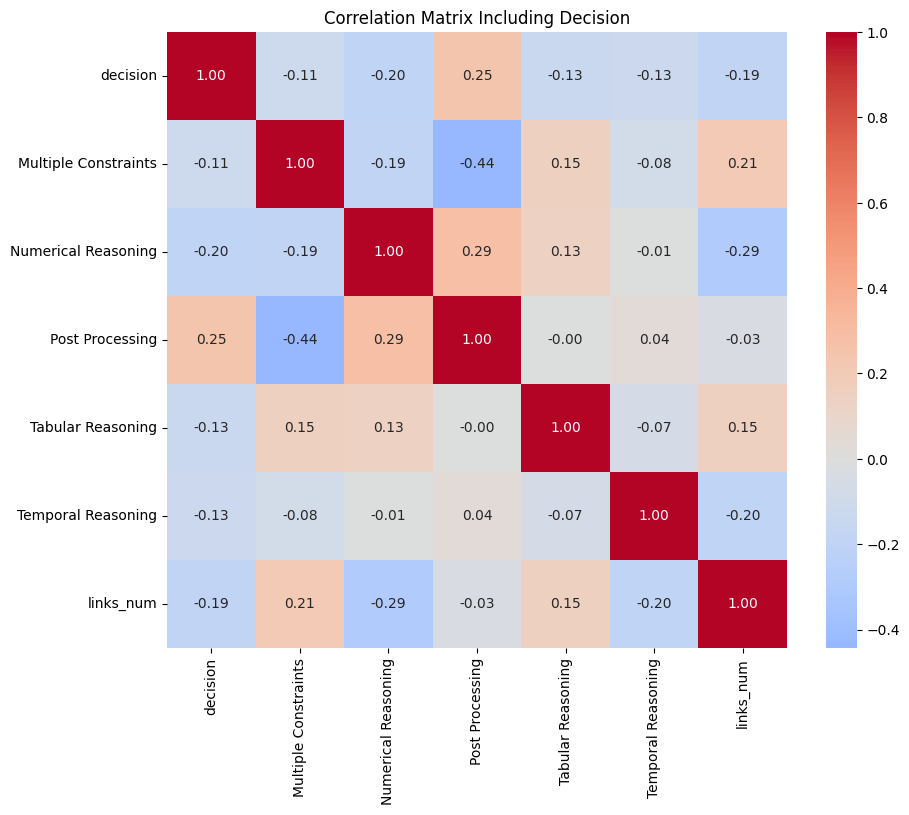

In [ ]:
decision_with_reason_type_with_num_links['decision'] = decision_with_reason_type_with_num_links['decision'].astype(int)

correlation_matrix_with_decision = decision_with_reason_type_with_num_links[['decision'] + numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_with_decision, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation Matrix Including Decision')
plt.show()

In [ ]:
grouped_data = decision_with_reason_type_with_num_links.groupby('links_num')['decision'].sum()

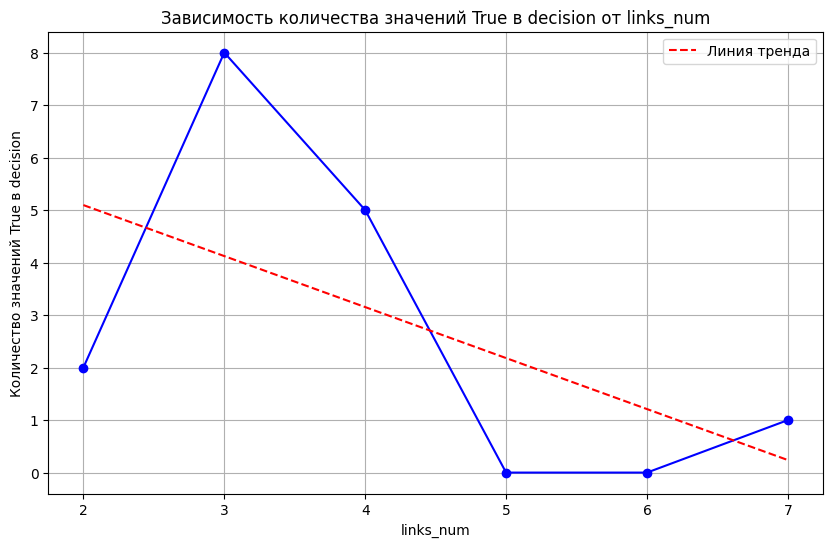

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_data.index, grouped_data.values, marker='o', linestyle='-', color='b')
plt.xlabel('links_num')
plt.ylabel('Количество значений True в decision')
plt.title('Зависимость количества значений True в decision от links_num')
plt.grid(True)

z = np.polyfit(grouped_data.index, grouped_data.values, 1)
p = np.poly1d(z)
plt.plot(grouped_data.index, p(grouped_data.index), linestyle='--', color='r', label='Линия тренда')
plt.legend()

plt.show()

In [8]:
cosinus_score=pd.read_csv('https://raw.githubusercontent.com/NazarovMM/RAG-system-for-dissertation/refs/heads/main/ragas_cosinus_score.csv')

In [9]:
cosinus_score.loc[0:30]

,user_input,response,reference,answer_correctness
0,If my future wife has the same first name as t...,"The 15th First Lady of the United States, Edit...",Jane Ballou,0.198153
1,Imagine there is a building called Bronte towe...,The Dewey Decimal Classification (DDC) for a C...,37th,0.184205
2,How many years earlier would Punxsutawney Phil...,The U.S. Capitol's current recognizable state ...,87,0.635026
3,"As of August 1, 2024, which country were holde...","As of August 1, 2024, the last time a London-b...",France,0.189862
4,What is the name of the vocalist from the firs...,The first band to enter the top 200 under Nucl...,Jens Kidman,0.198350
5,"According to the 2000 United States census, wh...",Kirk Watson was born in Oklahoma City. Accordi...,506000,0.186666
6,I have an element in mind and would like you t...,The element Zirconium was discovered by Martin...,Mendelevium is named after Dmitri Mendeleev.,0.200282
7,"As of Aug 3, 2024, the artist who released the...","The diver you're referring to is Tom Daley, wh...",2,0.185669
8,A general motors vehicle is named after the la...,The first model year of the Chevrolet Monte Ca...,4,0.182603
9,The Pope born Pietro Barbo ended a long-runnin...,"The Pope born Pietro Barbo, known as Pope Paul...",The Battle of Hastings.,0.423364


In [ ]:
decision_with_reason_type_2=pd.concat([df, reason_type.loc[0:29]], axis=1)

In [ ]:
cosinus_score_plus_llm_answer=pd.concat([cosinus_score, decision_with_reason_type_2['decision']], axis=1)

In [ ]:
cosinus_score_plus_llm_answer.loc[17:24]

,user_input,response,reference,answer_correctness,decision
17,"In August of 2024, what is the first name of the mayor of the U.S. state capital city who attended the same university as at least one U.S. president and whose city is home to an outgoing or former full member of the Big 12 Conference","The first name of the mayor of Austin, Texas, in August 2024 is likely ""Kirk,"" as Kirk Watson is currently serving as the mayor and began his second term in January 2023.",Leirion,0.181658,False
18,"How many years after the founding of the 50th most populous US city, based on 2023 estimate population data, did Frank Fox receive UK Patent (1344259)?",I don't know.,"98 Years (Arlington, TX & Rubik's Cube)",0.184493,False
19,"As of August 4, 2024, in what state was the first secretary of the latest United States federal executive department born?","Tom Ridge was born in Munhall, Pennsylvania.",Pennsylvania,0.207058,True
20,"As of August 1 2024, what is the most recently described genus of Colosteidae?",I don't know.,"Deltaherpeton, first described in 2010",0.184349,False
21,Małgorzata Rożniecka is a model who won the title of Miss International. What is the difference in title years from when she won and the pageant winner who was murdered by her stalker?,"Małgorzata Rożniecka won Miss International in 2001. The only Miss International winner who was murdered by a stalker was Miss International 1992, Agnieszka Kotlarska. The difference in title years between their wins is 9 years, from 1992 to 2001.",10 years,0.932256,False
22,"According to the 1990 United States census, what was the total population of the cities in Oklahoma that had at least 100,000 residents according to the 2020 United States census?","I'm sorry, but I don't have the specific population numbers for Oklahoma cities from the 1990 United States census in the provided context. Therefore, I cannot accurately determine the total population of Oklahoma cities with at least 100,000 residents in 2020 based on the 1990 census data.",950135,0.180777,False
23,"What was the political party of the person who advocated for the type of government used in Chikhali, Latur district to become the foundation of India's political system?","The individual who advocated for the Panchayati Raj system, which is used as a form of government in many local areas across India including Chikhali in the Latur district, was Mahatma Gandhi. He envisioned Gram Swaraj, or village self-governance, through the Panchayati Raj system. Gandhi did not belong to a conventional political party as understood today but was a leading figure of the Indian National Congress, which was the primary organization advocating for Indian independence during his time.",Indian National Congress,0.954862,True
24,"Giorgio Rognoni was an Italian professional footballer who played as a midfielder. 10 years after his death who was the midfielder who played in Milan that was born in Besana in Brianza,?","Demetrio Albertini is the midfielder born in Besana in Brianza who played in Milan. Giorgio Rognoni, who was also a midfielder, passed away in 1986, and Albertini began his professional career with AC Milan debuting in Serie A in 1989.",Demetrio Albertini,0.225825,True
